# Correlation analysis between signal data and wear

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline


## Combine data files

### Create one dataframe for all data in c1 folder

In [16]:
# Load the wear data
c1_wear_data = pd.read_csv('../notebooks/data_phm2010/raw/c1/c1_wear.csv', sep=',')

# Load all c1 data files
c1_data_folder = '../notebooks/data_phm2010/raw/c1/c1/'
c1_sensor_data_list = []

for i in range(1, 316):
    file_name = f'c_1_{i:03d}.csv'
    file_path = os.path.join(c1_data_folder, file_name)
    sensor_data = pd.read_csv(file_path, header=None)
    sensor_data.columns = ['Force_X', 'Force_Y', 'Force_Z', 'Vibration_X', 'Vibration_Y', 'Vibration_Z', 'AE_RMS']
    # Add a 'cut' column for merging
    sensor_data['cut'] = i
    c1_sensor_data_list.append(sensor_data)

c1_data = pd.concat(c1_sensor_data_list, ignore_index=True)

c1_merged = pd.merge(c1_data, c1_wear_data, on='cut', how='inner')

Test for missing data to check if the merge of files was successful:

In [17]:
c1_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69200145 entries, 0 to 69200144
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Force_X      float64
 1   Force_Y      float64
 2   Force_Z      float64
 3   Vibration_X  float64
 4   Vibration_Y  float64
 5   Vibration_Z  float64
 6   AE_RMS       float64
 7   cut          int64  
 8   flute_1      float64
 9   flute_2      float64
 10  flute_3      float64
dtypes: float64(10), int64(1)
memory usage: 5.7 GB


The data set still has no missing values. The first file (c_1_001) of the c1 folder contains 127399 rows of data (and no column headers). Below are the first 127403 rows of the merged dataset (the first and last 5 of them being visible), where the last 4 contains data originally saved into the second file. This continuation (and the cut number increasing by 1) proves the successful merge.

In [33]:
c1_merged.head(127403)

,Force_X,Force_Y,Force_Z,Vibration_X,Vibration_Y,Vibration_Z,AE_RMS,cut,flute_1,flute_2,flute_3
0,0.704,-0.387,-1.084,0.018,0.031,0.027,-0.004,1,32.317114,48.892617,37.720825
1,0.772,-0.573,-1.153,-0.056,-0.057,-0.058,-0.004,1,32.317114,48.892617,37.720825
2,0.828,-0.673,-1.242,0.037,0.019,0.031,-0.004,1,32.317114,48.892617,37.720825
3,0.866,-0.601,-1.311,-0.028,-0.027,-0.022,-0.004,1,32.317114,48.892617,37.720825
4,0.910,-0.377,-1.341,-0.050,-0.049,-0.058,-0.004,1,32.317114,48.892617,37.720825
...,...,...,...,...,...,...,...,...,...,...,...
127398,0.207,0.483,0.292,0.111,0.114,0.125,-0.004,1,32.317114,48.892617,37.720825
127399,-0.100,-1.397,1.541,-0.077,-0.097,-0.097,-0.005,2,37.914879,49.570815,37.720825
127400,-0.174,-1.472,1.489,-0.029,-0.046,-0.051,-0.005,2,37.914879,49.570815,37.720825
127401,-0.225,-1.503,1.449,-0.017,-0.033,-0.022,-0.005,2,37.914879,49.570815,37.720825


## Correlations of c1 dataset

In [34]:
corr_matrix = c1_merged.drop(columns=['cut']).corr()

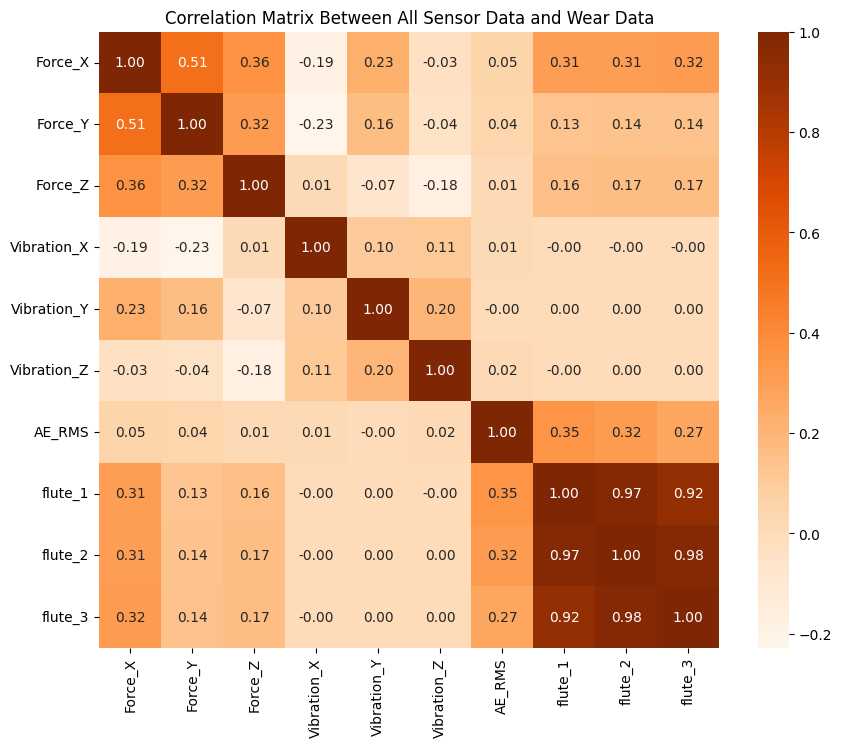

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='Oranges', cbar=True)
plt.title('Correlation Matrix Between All Sensor Data and Wear Data')
plt.show()

The correlation matrix indicates a moderate relationship between the 'Force_X' data and wear on the milling bit, with similar wear observed across all flutes. The accoustiv emission data shows ecually strong assosiation, although the correlation with each flutes decreases in the opposite order. 'Force_X' has stronger correlation with the 3rd flute, while the accoustic emission with the 1st. In contrast, the vibration measurements exhibit no correlation with wear, while 'Force_Z' and 'Force_Y' shows progressively weaker correlation

In [37]:
# same for c4 and c6 datasets
# then, somehow concatenating the 3 datasets, but I hit memory issues even with dusk
# maybe just calculating relevant correlations for the other 2 folder and concatenating only the results of those

## Correlations between Signal Statistics and Wear data

### Means and wear

In [21]:
# Initialize a list to store the statistics
mean_list = []

# Calculate statistics for mean
for i in range(1, 316):
    file_name = f'c_1_{i:03d}.csv'
    file_path = os.path.join(c1_data_folder, file_name)
    sensor_data = pd.read_csv(file_path, header=None)
    mean = sensor_data.mean()
    
    # Store the statistics
    stats_row = {
        'cut': i,
        'Mean Force (X)': mean[0],
        'Mean Force (Y)': mean[1],
        'Mean Force (Z)': mean[2],
        'Mean Vibration (X)': mean[3],
        'Mean Vibration (Y)': mean[4],
        'Mean Vibration (Z)': mean[5],
        'Mean AE_RMS': mean[6]
    }
    mean_list.append(stats_row)

mean_stats_df = pd.DataFrame(mean_list)

# Merge the statistics with wear data
all_mean_stats = pd.merge(mean_stats_df, c1_wear_data, on='cut')

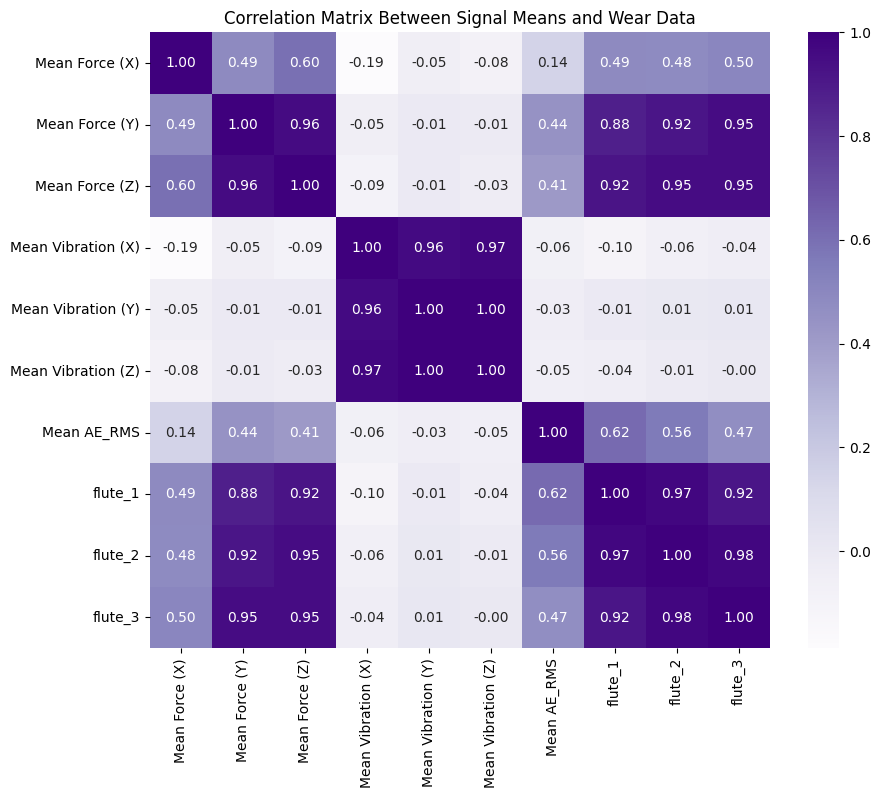

In [22]:
# Calculate and display the correlation matrix
mean_corr_matrix = all_mean_stats.drop(columns=['cut']).corr()

plt.figure(figsize=(10,8))
sns.heatmap(mean_corr_matrix, annot=True, fmt='.2f', cmap='Purples', cbar=True)
plt.title('Correlation Matrix Between Signal Means and Wear Data')
plt.show()

### Standard Deviation and Wear

In [23]:
# Initialize a list to store the statistics
std_list = []

# Calculate statistics for std
for i in range(1, 316):
    file_name = f'c_1_{i:03d}.csv'
    file_path = os.path.join(c1_data_folder, file_name)
    sensor_data = pd.read_csv(file_path, header=None)
    std = sensor_data.std()
    
    # Store the statistics
    stats_row = {
        'cut': i,
        'std Force (X)': std[0],
        'std Force (Y)': std[1],
        'std Force (Z)': std[2],
        'std Vibration (X)': std[3],
        'std Vibration (Y)': std[4],
        'std Vibration (Z)': std[5],
        'std AE_RMS': std[6]
    }
    std_list.append(stats_row)

std_stats_df = pd.DataFrame(std_list)

# Merge the statistics with wear data
all_std_stats = pd.merge(std_stats_df, c1_wear_data, on='cut')

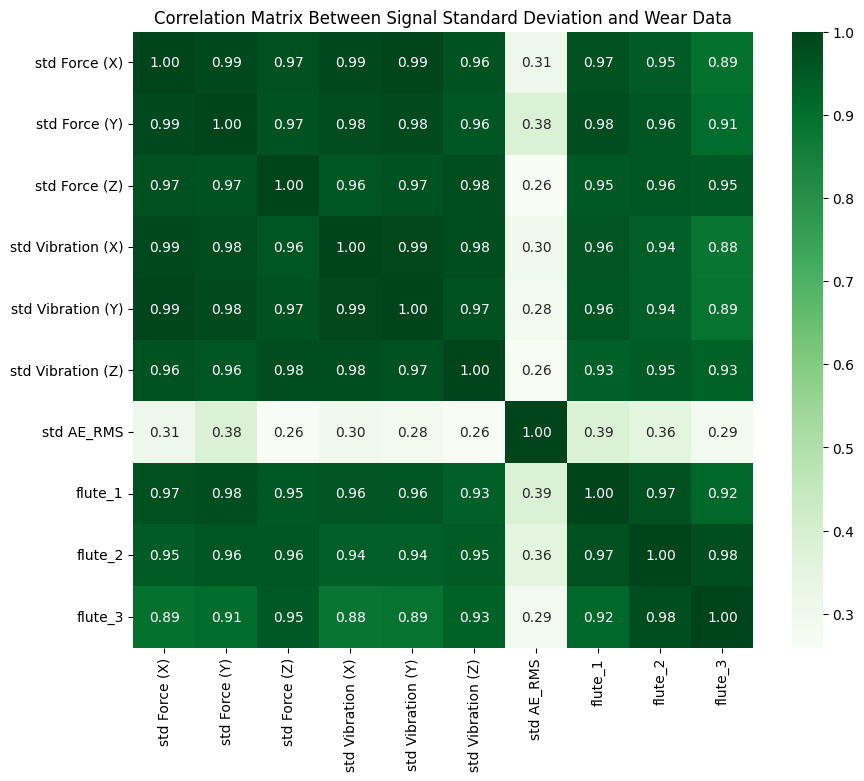

In [24]:
# Calculate and display the std correlation matrix
std_corr_matrix = all_std_stats.drop(columns=['cut']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(std_corr_matrix, annot=True, fmt='.2f', cmap='Greens', cbar=True)
plt.title('Correlation Matrix Between Signal Standard Deviation and Wear Data')
plt.show()

### Skewness and Wear

In [25]:
from scipy.stats import skew

# Initialize a list to store the statistics
skew_list = []

# Calculate statistics for skew
for i in range(1, 316):
    file_name = f'c_1_{i:03d}.csv'
    file_path = os.path.join(c1_data_folder, file_name)
    sensor_data = pd.read_csv(file_path, header=None)
    skewness = skew(sensor_data)
    
    # Store the statistics
    stats_row = {
        'cut': i,
        'Skew Forc (X)': skewness[0],
        'Skew Force (Y)': skewness[1],
        'Skew Force (Z)': skewness[2],
        'Skew Vibration (X)': skewness[3],
        'Skew Vibration (Y)': skewness[4],
        'Skew Vibration (Z)': skewness[5],
        'Skew AE_RMS': skewness[6]
    }
    skew_list.append(stats_row)

skew_stats_df = pd.DataFrame(skew_list)

# Merge the statistics with wear data
all_skew_stats = pd.merge(skew_stats_df, c1_wear_data, on='cut')

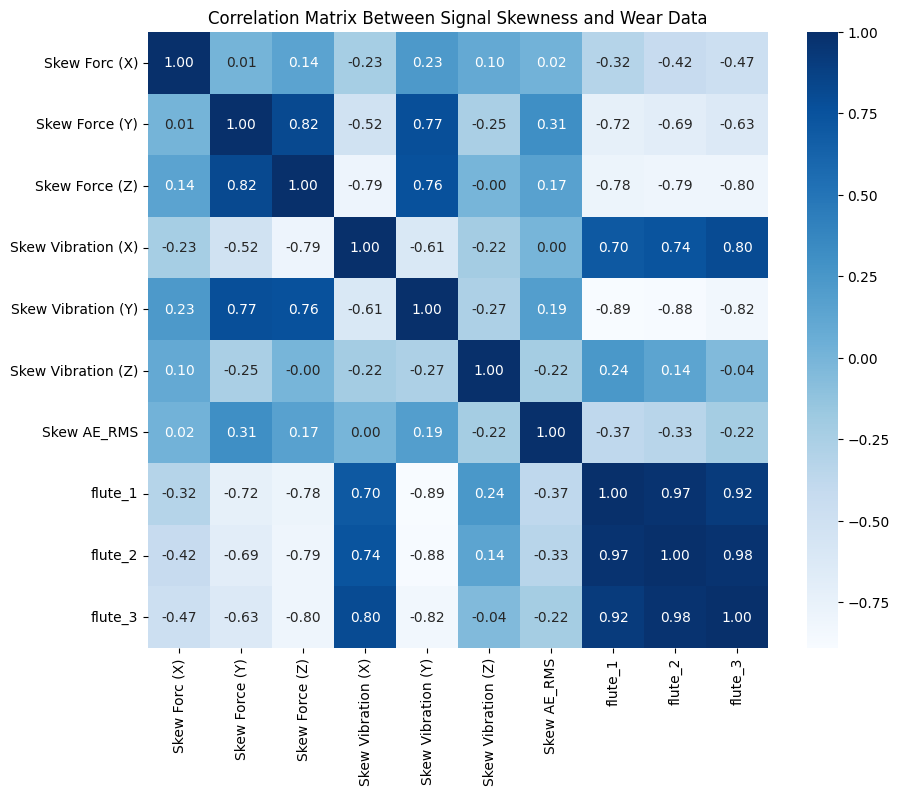

In [26]:
# Calculate and display the skew correlation matrix
skew_corr_matrix = all_skew_stats.drop(columns=['cut']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(skew_corr_matrix, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.title('Correlation Matrix Between Signal Skewness and Wear Data')
plt.show()

In [27]:
from scipy.stats import kurtosis

# Initialize a list to store the statistics
kurt_list = []

# Calculate statistics for kurtosis
for i in range(1, 316):
    file_name = f'c_1_{i:03d}.csv'
    file_path = os.path.join(c1_data_folder, file_name)
    sensor_data = pd.read_csv(file_path, header=None)
    kurt = kurtosis(sensor_data)
    
    # Store the statistics
    stats_row = {
        'cut': i,
        'Kurt Force (X)': kurt[0],
        'Kurt Force (Y)': kurt[1],
        'Kurt Force (Z)': kurt[2],
        'Kurt Vibration (X)': kurt[3],
        'Kurt Vibration (Y)': kurt[4],
        'Kurt Vibration (Z)': kurt[5],
        'Kurt AE_RMS': kurt[6]
    }
    kurt_list.append(stats_row)

kurt_stats_df = pd.DataFrame(kurt_list)

# Merge the statistics with wear data
all_kurt_stats = pd.merge(kurt_stats_df, c1_wear_data, on='cut')

### Kurtosis and Wear

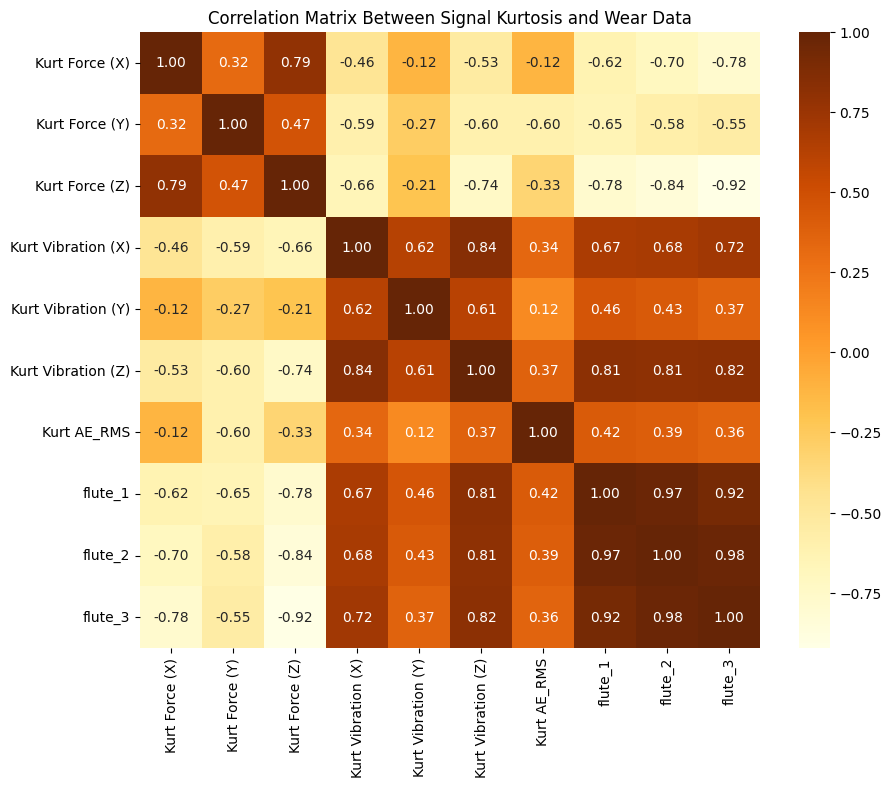

In [28]:
# Calculate and display the correlation matrix
kurt_corr_matrix = all_kurt_stats.drop(columns=['cut']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(kurt_corr_matrix, annot=True, fmt='.2f', cmap='YlOrBr', cbar=True)
plt.title('Correlation Matrix Between Signal Kurtosis and Wear Data')
plt.show()

### Force Statistics and Wear

In [29]:
force_x_stats_list = []

for i in range(1, 316):
    file_name = f'c_1_{i:03d}.csv'
    file_path = os.path.join(c1_data_folder, file_name)
    sensor_data = pd.read_csv(file_path, header=None)
    
    mean = sensor_data.mean()
    std = sensor_data.std()
    skewness = skew(sensor_data)
    kurt = kurtosis(sensor_data)
    min_values = sensor_data.min()
    max_values = sensor_data.max()
    energy = (sensor_data ** 2).sum()
    
    stats_row = {
        'cut': i,
        'Mean Force_X': mean[0],
        'std Force_X': std[0],
        'min Force_X': min_values[0],
        'max Force_X': max_values[0],
        'energy Force_X': energy[0]
    }
    force_x_stats_list.append(stats_row)
    
force_x_stats_df = pd.DataFrame(force_x_stats_list)

# Merge the statistics with wear data
all_force_x_stats = pd.merge(force_x_stats_df, c1_wear_data, on='cut')

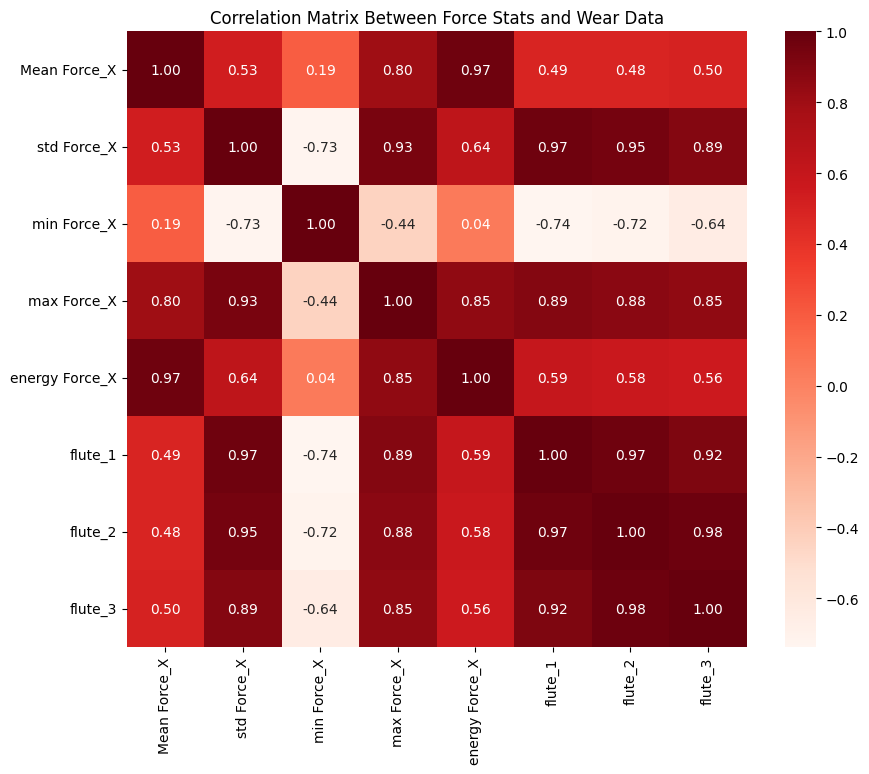

In [30]:
# Calculate and display the correlation matrix
force_x_corr_matrix = all_force_x_stats.drop(columns=['cut']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(force_x_corr_matrix, annot=True, fmt='.2f', cmap='Reds', cbar=True)
plt.title('Correlation Matrix Between Force Stats and Wear Data')
plt.show()

### Acoustic Emission Statistics and Wear

In [31]:
ae_stats_list = []

for i in range(1, 316):
    file_name = f'c_1_{i:03d}.csv'
    file_path = os.path.join(c1_data_folder, file_name)
    sensor_data = pd.read_csv(file_path, header=None)
    
    mean = sensor_data.mean()
    std = sensor_data.std()
    skewness = skew(sensor_data)
    kurt = kurtosis(sensor_data)
    min_values = sensor_data.min()
    max_values = sensor_data.max()
    energy = (sensor_data ** 2).sum()
    
    stats_row = {
        'cut': i,
        'Mean AE_RMS': mean[6],
        'std AE_RMS': std[6],
        'min AE_RMS': min_values[6],
        'max AE_RMS': max_values[6],
        'energy AE_RMS': energy[6]
    }
    ae_stats_list.append(stats_row)
    
ae_stats_df = pd.DataFrame(ae_stats_list)

# Merge the statistics with wear data
all_ae_stats = pd.merge(ae_stats_df, c1_wear_data, on='cut')

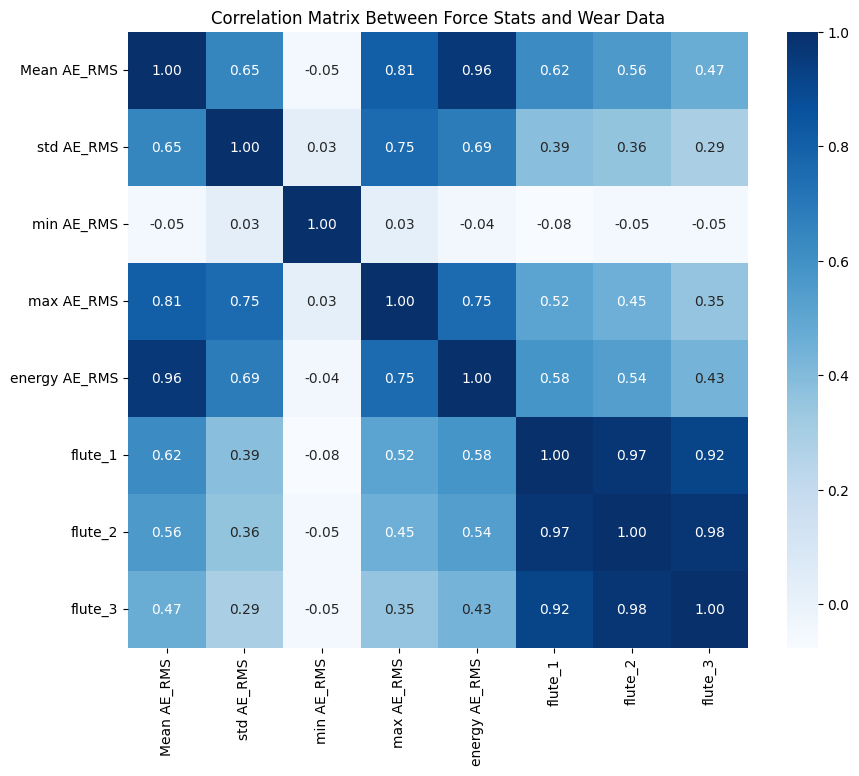

In [32]:
# Calculate and display the correlation matrix
ae_corr_matrix = all_ae_stats.drop(columns=['cut']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(ae_corr_matrix, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.title('Correlation Matrix Between Force Stats and Wear Data')
plt.show()